Ejercicio práctico para aplicar los conceptos aprendidos.
Ejercicio: Análisis probabilístico de comportamiento de clientes en e-commerce

Análisis de distribución de compras por cliente:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generar dataset de comportamiento de clientes
np.random.seed(42)
n_clientes = 10000

# Simular compras por cliente (distribución Poisson)
compras_por_cliente = np.random.poisson(lam=2.5, size=n_clientes)

# Simular valor de compra (distribución log-normal)
valor_compra = np.random.lognormal(mean=4.5, sigma=0.8, size=n_clientes)

# Crear DataFrame
df = pd.DataFrame({
    'cliente_id': range(1, n_clientes + 1),
    'compras_anuales': compras_por_cliente,
    'valor_promedio_compra': valor_compra,
    'gasto_total_anual': compras_por_cliente * valor_compra
})

print("Análisis probabilístico de comportamiento de clientes")
print("=" * 55)
print(f"Total clientes analizados: {len(df):,}")
print(f"Compras promedio por cliente/año: {df['compras_anuales'].mean():.2f}")
print(f"Valor promedio de compra: ${df['valor_promedio_compra'].mean():.2f}")

Análisis probabilístico de comportamiento de clientes
Total clientes analizados: 10,000
Compras promedio por cliente/año: 2.51
Valor promedio de compra: $122.82


Análisis de distribuciones y probabilidades:

In [5]:
# Análisis de distribución de compras
print("\nDISTRIBUCIÓN DE COMPRAS ANUALES")
print("-" * 35)
print(df['compras_anuales'].value_counts().sort_index().head(10))

# Probabilidades usando distribución de Poisson
lambda_compras = df['compras_anuales'].mean()

print(f"\nProbabilidades (usando distribución de Poisson λ={lambda_compras:.2f}):")
print(f"P(0 compras/año): {stats.poisson.pmf(0, lambda_compras):.4f}")
print(f"P(1 compra/año): {stats.poisson.pmf(1, lambda_compras):.4f}")
print(f"P(5+ compras/año): {1 - stats.poisson.cdf(4, lambda_compras):.4f}")

# Análisis de valor de compra
print(f"\nANÁLISIS DE VALOR DE COMPRA")
print("-" * 30)
print(f"Media: ${df['valor_promedio_compra'].mean():.2f}")
print(f"Mediana: ${df['valor_promedio_compra'].median():.2f}")
print(f"Desviación estándar: ${df['valor_promedio_compra'].std():.2f}")

# Test de normalidad para valor de compra
_, p_valor = stats.normaltest(df['valor_promedio_compra'])
print(f"Test de normalidad (p-valor): {p_valor:.4f}")
print(f"¿Es normal?: {'No' if p_valor < 0.05 else 'Sí'}")


DISTRIBUCIÓN DE COMPRAS ANUALES
-----------------------------------
compras_anuales
0     803
1    2088
2    2497
3    2197
4    1317
5     677
6     280
7      95
8      32
9       9
Name: count, dtype: int64

Probabilidades (usando distribución de Poisson λ=2.51):
P(0 compras/año): 0.0816
P(1 compra/año): 0.2045
P(5+ compras/año): 0.1096

ANÁLISIS DE VALOR DE COMPRA
------------------------------
Media: $122.82
Mediana: $89.13
Desviación estándar: $116.85
Test de normalidad (p-valor): 0.0000
¿Es normal?: No


Aplicación del teorema del límite central:

In [6]:
# Demostración del teorema del límite central
n_muestras = 1000
tamano_muestra = 50

medias_muestrales = []
for _ in range(n_muestras):
    muestra = np.random.choice(df['gasto_total_anual'], size=tamano_muestra, replace=True)
    medias_muestrales.append(np.mean(muestra))

# Análisis de la distribución de medias muestrales
medias_array = np.array(medias_muestrales)
media_muestral_global = np.mean(medias_array)
error_estandar = np.std(medias_array)

print(f"\nTEOREMA DEL LÍMITE CENTRAL")
print("-" * 30)
print(f"Media de medias muestrales: ${media_muestral_global:.2f}")
print(f"Media poblacional real: ${df['gasto_total_anual'].mean():.2f}")
print(f"Error estándar de medias: ${error_estandar:.2f}")

# Intervalo de confianza
z_score = 1.96  # 95% confianza
margen_error = z_score * error_estandar
ic_inferior = media_muestral_global - margen_error
ic_superior = media_muestral_global + margen_error

print(f"Intervalo de confianza 95%: (${ic_inferior:.2f}, ${ic_superior:.2f})")
print(f"Margen de error: ${margen_error:.2f}")


TEOREMA DEL LÍMITE CENTRAL
------------------------------
Media de medias muestrales: $308.72
Media poblacional real: $306.16
Error estándar de medias: $57.84
Intervalo de confianza 95%: ($195.36, $422.09)
Margen de error: $113.36


Visualización de distribuciones:


Visualizaciones guardadas como 'distribuciones_probabilidad_clientes.png'


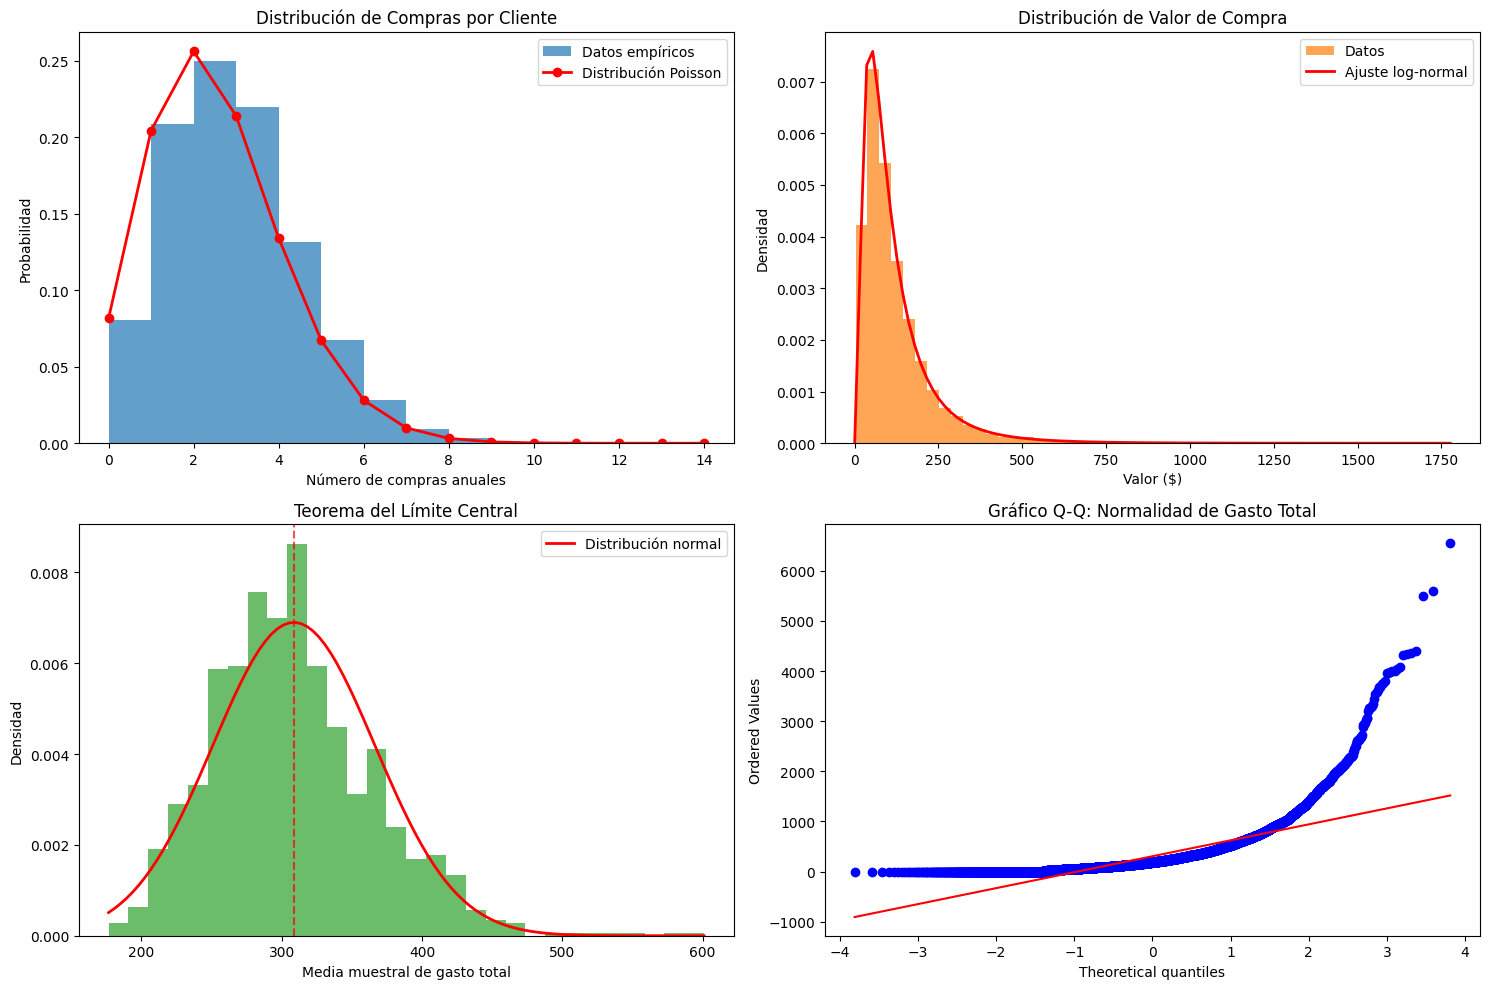

In [7]:
# Crear visualización de distribuciones
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Distribución de compras (comparar empírica vs teórica)
ax1.hist(df['compras_anuales'], bins=range(0, 15), alpha=0.7, density=True, 
        color='#1f77b4', label='Datos empíricos')

x_poisson = range(0, 15)
y_poisson = [stats.poisson.pmf(x, lambda_compras) for x in x_poisson]
ax1.plot(x_poisson, y_poisson, 'ro-', label='Distribución Poisson', linewidth=2)
ax1.set_title('Distribución de Compras por Cliente')
ax1.set_xlabel('Número de compras anuales')
ax1.set_ylabel('Probabilidad')
ax1.legend()

# Distribución de valor de compra
ax2.hist(df['valor_promedio_compra'], bins=50, alpha=0.7, density=True, 
        color='#ff7f0e', label='Datos')

# Ajuste de distribución log-normal
params = stats.lognorm.fit(df['valor_promedio_compra'])
x_fit = np.linspace(0, df['valor_promedio_compra'].max(), 100)
y_fit = stats.lognorm.pdf(x_fit, *params)
ax2.plot(x_fit, y_fit, 'r-', linewidth=2, label='Ajuste log-normal')
ax2.set_title('Distribución de Valor de Compra')
ax2.set_xlabel('Valor ($)')
ax2.set_ylabel('Densidad')
ax2.legend()

# Distribución de medias muestrales (TLC)
ax3.hist(medias_array, bins=30, alpha=0.7, density=True, color='#2ca02c')

# Añadir curva normal teórica
x_normal = np.linspace(medias_array.min(), medias_array.max(), 100)
y_normal = stats.norm.pdf(x_normal, media_muestral_global, error_estandar)
ax3.plot(x_normal, y_normal, 'r-', linewidth=2, label='Distribución normal')
ax3.axvline(media_muestral_global, color='red', linestyle='--', alpha=0.7)
ax3.set_title('Teorema del Límite Central')
ax3.set_xlabel('Media muestral de gasto total')
ax3.set_ylabel('Densidad')
ax3.legend()

# Gráfico Q-Q para normalidad
stats.probplot(df['gasto_total_anual'], dist="norm", plot=ax4)
ax4.set_title('Gráfico Q-Q: Normalidad de Gasto Total')

plt.tight_layout()
plt.savefig('distribuciones_probabilidad_clientes.png', dpi=300, bbox_inches='tight')
print("\nVisualizaciones guardadas como 'distribuciones_probabilidad_clientes.png'")

Verificación: Explica cómo las distribuciones probabilísticas (Poisson para conteos, log-normal para valores) modelan mejor el comportamiento de clientes que las distribuciones normales, y cómo el teorema del límite central justifica el uso de estadística paramétrica en análisis de muestras.

Respuesta:

1. ¿Por qué Poisson y Log-normal modelan mejor la realidad que la Normal?
La distribución Normal (la clásica campana de Gauss) asume dos cosas que raramente ocurren en el comportamiento de compra: simetría y continuidad infinita (desde −∞ hasta +∞). Veamos por qué falla y por qué las otras ganan:

A. Conteos de Compra: Poisson vs. Normal
Imagina que analizamos cuántas veces compra un cliente al año.
- El problema de la Normal: Si el promedio es 2 compras al año, una distribución Normal asignaría probabilidad a valores imposibles como -1 compra (¡no se puede des-comprar!) o 2.35 compras (no se puede hacer media compra). Además, asume que es igual de probable tener 4 compras que 0 compras (simetría), lo cual no suele ser cierto.
- La solución de Poisson:
1. Discreta: Solo permite números enteros (0, 1, 2, 3...).
2. Piso en Cero: La probabilidad empieza en 0; no existen negativos.
3. Asimetría natural: Permite modelar que la gran mayoría compre poco (1-3 veces) y una pequeña cola de clientes compre mucho, sin necesitar simetría.

B. Valor Monetario: Log-normal vs. Normal
Imagina que analizamos cuánto gasta cada cliente por ticket.
- El problema de la Normal: El dinero tiene un límite inferior duro (10. Además, subestima a los "grandes gastadores" (outliers).
- La solución Log-normal:
1. Positiva: Solo existe para valores > 0.
2. Cola Larga (Heavy Tail): Esta es la clave. En e-commerce, muchos gastan poco y unos pocos gastan muchísimo (los VIP). La Log-normal captura perfectamente esta "cola derecha" larga, donde se esconden los tickets de alto valor que una distribución Normal consideraría estadísticamente "imposibles".

2. El "Truco de Magia": El Teorema del Límite Central (TLC)
Aquí surge una contradicción: Acabamos de decir que los datos de clientes NO son Normales (son Poisson o Log-normal). Sin embargo, para calcular intervalos de confianza o hacer tests de hipótesis (estadística paramétrica), las fórmulas suelen requerir normalidad.
- ¿Cómo se pueden usar esas fórmulas si los datos no son normales?
- Aquí entra el Teorema del Límite Central (TLC) para salvarnos:
a. Lo que dice: No importa qué forma extraña tenga una distribución original de datos (pueden ser picos, curvas logarítmicas, planas, etc.). Si se toman muchas muestras aleatorias y se calcula el promedio de cada una, esos promedios se distribuirán formando una campana de Gauss (Normal).
b. La justificación:
- Aunque el gasto individual de un cliente sea Log-normal (muy sesgado).
- El gasto promedio de grupos de 50 clientes tendrá una distribución Normal.
c. El resultado práctico: Gracias al TLC, se pueden usar herramientas como el Z-score (que usaste en el código para el intervalo de confianza) o el Test T, porque no se está evaluando a un individuo aleatorio, sino estimando la media de la población.

En resumen:
- Se usa Poisson/Log-normal para describir a los individuos (porque se ajustan a la realidad del negocio).
- Se usa Estadística Paramétrica (basada en Normal) para hacer inferencias sobre los promedios, confiando en que el Teorema del Límite Central valida esas matemáticas.